### El objetivo principal es predecir el valor de la casa

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from cv_error import *
plt.rcParams['figure.figsize'] = (10,6)
plt.style.use('seaborn-darkgrid')

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.drop(['zipcode','id','date'],axis=1,inplace=True)

In [4]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [5]:
print('Numero de filas es:',df.shape[0])
print('Nuermo de columnas es:',df.shape[1])

Numero de filas es: 21613
Nuermo de columnas es: 18


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(13)
memory usage: 3.0 MB


In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [9]:
df_scaled['price']= np.log(df['price'])
df_scaled.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,12.309982,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.734708,-0.658681,-0.544898,-0.210128,-0.352572,-0.306079,-0.943355,-0.260715
1,13.195614,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.460841,0.245141,-0.681079,4.746678,1.161568,-0.746341,-0.432686,-0.187868
2,12.100712,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,-1.229834,-0.658681,-1.293892,-0.210128,1.283537,-0.135655,1.070140,-0.172375
3,13.311329,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.558836,-0.891699,1.397515,-0.204446,-0.210128,-0.283288,-1.271816,-0.914174,-0.284522
4,13.142166,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,-0.130895,-0.658681,0.544548,-0.210128,0.409550,1.199335,-0.272190,-0.192849


Text(0.5, 1.0, 'Histograma Logaritmo Precio')

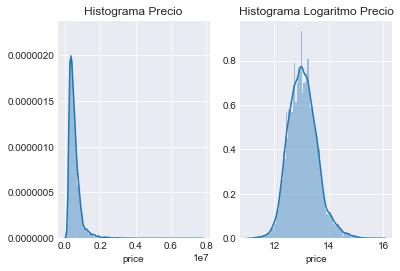

In [10]:
fig, ax = plt.subplots(1,2)
sns.distplot(df['price'],bins='fd',ax=ax[0])
ax[0].set_title('Histograma Precio')
sns.distplot(df_scaled['price'],bins='fd',ax=ax[1])
ax[1].set_title('Histograma Logaritmo Precio')

Se observa como al trabajar con logaritmos, se posee un modelo menos sesgado, lo que da mejor pie para trabajar con regresion

##### Busqueda de hiperparametros , para regularizacion

In [11]:
from sklearn.linear_model import Ridge,RidgeCV,Lasso,LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [12]:
X = df_scaled.iloc[:,1:]
N = X.shape[0]
X.insert(X.shape[1],'intercept',np.ones(N))
y = df_scaled['price']
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=.33,random_state= 63)

In [13]:
alphas = np.logspace(0,7,base=10)
alphas

array([1.00000000e+00, 1.38949549e+00, 1.93069773e+00, 2.68269580e+00,
       3.72759372e+00, 5.17947468e+00, 7.19685673e+00, 1.00000000e+01,
       1.38949549e+01, 1.93069773e+01, 2.68269580e+01, 3.72759372e+01,
       5.17947468e+01, 7.19685673e+01, 1.00000000e+02, 1.38949549e+02,
       1.93069773e+02, 2.68269580e+02, 3.72759372e+02, 5.17947468e+02,
       7.19685673e+02, 1.00000000e+03, 1.38949549e+03, 1.93069773e+03,
       2.68269580e+03, 3.72759372e+03, 5.17947468e+03, 7.19685673e+03,
       1.00000000e+04, 1.38949549e+04, 1.93069773e+04, 2.68269580e+04,
       3.72759372e+04, 5.17947468e+04, 7.19685673e+04, 1.00000000e+05,
       1.38949549e+05, 1.93069773e+05, 2.68269580e+05, 3.72759372e+05,
       5.17947468e+05, 7.19685673e+05, 1.00000000e+06, 1.38949549e+06,
       1.93069773e+06, 2.68269580e+06, 3.72759372e+06, 5.17947468e+06,
       7.19685673e+06, 1.00000000e+07])

In [14]:
names_regresors = X_train.columns

In [15]:
coefs_ridge, cv_error_ridge = [],[]
model_ridge = Ridge(fit_intercept=True)


for a in alphas:
    model_ridge.set_params(alpha=a)
    model_ridge.fit(X_train,y_train)
    coefs_ridge.append(model_ridge.coef_)
    dummy, cv_error_estimates = cv_error(X_train,y_train,k=10,method= 'ridge',alpha=a)
    cv_error_ridge.append(np.mean(cv_error_estimates))

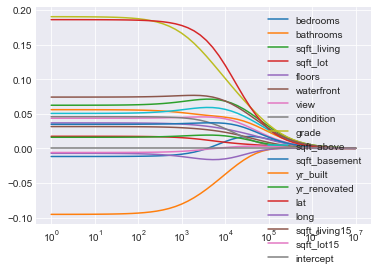

In [16]:
ax = plt.gca()

for y_arr, label in zip(np.squeeze(coefs_ridge).T,names_regresors):
    plt.plot(alphas,y_arr,label=label)
    
    
ax.set_xscale('log')
plt.legend(loc=1)

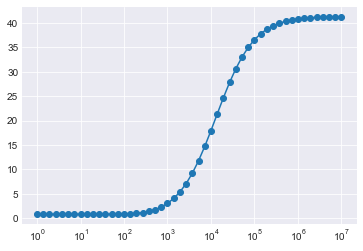

In [17]:
ax= plt.gca()
plt.plot(alphas,np.sqrt(cv_error_ridge),'o-')
ax.set_xscale('log')

In [18]:
ridge_cv = RidgeCV(cv=10)
model_ridge = ridge_cv.fit(X_train,y_train)

In [19]:
model_ridge.alpha_

10.0

In [20]:
model_ridge.coef_

array([-0.01152051,  0.05594325,  0.06247254,  0.01758403,  0.03688535,
        0.03158963,  0.04366224,  0.04588752,  0.18988215,  0.05064816,
        0.03487782, -0.09486206,  0.01621742,  0.18580857, -0.00701508,
        0.07418383, -0.00576774,  0.        ])

In [21]:
from sklearn.metrics import r2_score
print(r2_score(model_ridge.predict(X_test),y_test))

0.6988363623658165


##### Lasso

In [22]:
alphas = np.logspace(0,-3,10)

coefs_lasso, cv_error_lasso = [],[]
model_lasso = Lasso(fit_intercept=True)


for a in alphas:
    model_lasso.set_params(alpha=a)
    model_lasso.fit(X_train,y_train)
    coefs_lasso.append(model_lasso.coef_)
    dummy, cv_error_estimates = cv_error(X_train,y_train,k=10,method= 'lasso',alpha=a)
    cv_error_lasso.append(np.mean(cv_error_estimates))

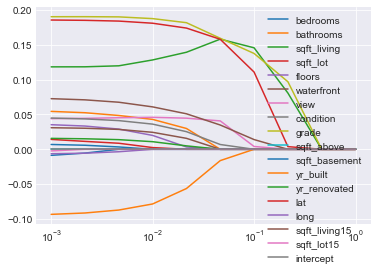

In [23]:
ax = plt.gca()

for y_arr, label in zip(np.squeeze(coefs_lasso).T,names_regresors):
    plt.plot(alphas,y_arr,label=label)
    
    
ax.set_xscale('log')
plt.legend(loc=1)

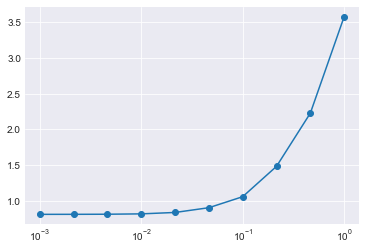

In [24]:
ax= plt.gca()
plt.plot(alphas,np.sqrt(cv_error_lasso),'o-')
ax.set_xscale('log')

In [25]:
lasso_cv = LassoCV()
model_lasso = lasso_cv.fit(X_train,y_train)

In [26]:
model_lasso.alpha_

0.0007063178420188417

In [27]:
model_lasso.coef_

array([-0.00950177,  0.054879  ,  0.11831375,  0.015189  ,  0.035774  ,
        0.03115456,  0.04389359,  0.0451542 ,  0.19025511,  0.        ,
        0.00719784, -0.09386775,  0.01582708,  0.18563712, -0.00654469,
        0.07312149, -0.00334994,  0.        ])

In [28]:
print(r2_score(model_lasso.predict(X_test),y_test))

0.6971593291452678


In [29]:
from sklearn.linear_model import ElasticNet,ElasticNetCV

In [30]:
alphas = np.logspace(0,-3,10)

coefs_elastic_net, cv_error_elastic_net = [],[]
model_elastic_net = ElasticNet(fit_intercept=True)


for a in alphas:
    model_elastic_net.set_params(alpha=a)
    model_elastic_net.fit(X_train,y_train)
    coefs_elastic_net.append(model_elastic_net.coef_)
    dummy, cv_error_estimates = cv_error(X_train,y_train,k=10,method= 'enet',alpha=a)
    cv_error_elastic_net.append(np.mean(cv_error_estimates))

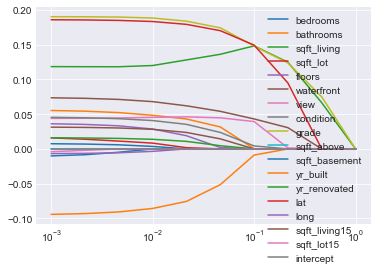

In [31]:
ax = plt.gca()

for y_arr, label in zip(np.squeeze(coefs_elastic_net).T,names_regresors):
    plt.plot(alphas,y_arr,label=label)
    
    
ax.set_xscale('log')
plt.legend(loc=1)

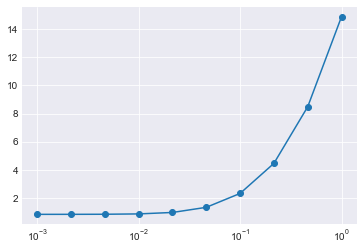

In [32]:
ax= plt.gca()
plt.plot(alphas,np.sqrt(cv_error_elastic_net),'o-')
ax.set_xscale('log')

In [33]:
elastic_cv = ElasticNetCV(cv=10)
model_elastic = elastic_cv.fit(X_train,y_train)


In [34]:
model_elastic.alpha_

0.000753881176897851

In [35]:
model_elastic_net.coef_

array([-0.01005139,  0.05519985,  0.11829303,  0.01588826,  0.03611868,
        0.0312784 ,  0.04382888,  0.04536035,  0.19006783,  0.        ,
        0.00743196, -0.09409532,  0.01595219,  0.18564379, -0.00669665,
        0.07350073, -0.00404366,  0.        ])

In [36]:
print(r2_score(model_elastic.predict(X_test),y_test))

0.6979256636726778


In [37]:
y_train

6912     13.693343
3972     12.834681
18295    12.959844
7136     12.310433
2976     12.971540
8521     13.244581
4953     12.535376
795      12.971424
10812    13.081541
18033    13.107250
14570    12.886641
21190    12.911642
16996    13.377006
15988    13.623139
4805     12.323745
8798     12.072541
1650     12.560069
20622    13.566254
21539    12.732279
16081    14.141211
7426     14.146970
14749    12.850555
19473    12.821258
11421    13.832368
2546     12.611204
4328     13.115846
6495     13.670485
20212    12.230765
12380    12.423198
15889    12.821258
           ...    
13982    13.304602
2168     12.751300
11981    13.795308
7814     12.581079
20916    13.171154
1020     13.641157
21262    13.233905
20777    12.441544
12167    12.206073
19246    12.994530
2163     13.253392
4313     12.971540
12512    12.324766
1770     14.669926
14933    13.113323
20120    12.994507
19128    12.958667
18970    13.265598
11022    13.055155
10028    12.873902
18118    13.151922
10866    13.

In [43]:
for i in df.iteritems():
    print(i)
    break

('price', 0         221900.0
1         538000.0
2         180000.0
3         604000.0
4         510000.0
5        1225000.0
6         257500.0
7         291850.0
8         229500.0
9         323000.0
10        662500.0
11        468000.0
12        310000.0
13        400000.0
14        530000.0
15        650000.0
16        395000.0
17        485000.0
18        189000.0
19        230000.0
20        385000.0
21       2000000.0
22        285000.0
23        252700.0
24        329000.0
25        233000.0
26        937000.0
27        667000.0
28        438000.0
29        719000.0
           ...    
21583     399950.0
21584     380000.0
21585     270000.0
21586     505000.0
21587     385000.0
21588     414500.0
21589     347500.0
21590    1222500.0
21591     572000.0
21592     475000.0
21593    1088000.0
21594     350000.0
21595     520000.0
21596     679950.0
21597    1575000.0
21598     541800.0
21599     810000.0
21600    1537000.0
21601     467000.0
21602     224000.0
21603     507250.0
21

In [44]:
import builtins


In [45]:
dir(builtins)

['ArithmeticError',
 'AssertionError',
 'AttributeError',
 'BaseException',
 'BlockingIOError',
 'BrokenPipeError',
 'BufferError',
 'BytesWarning',
 'ChildProcessError',
 'ConnectionAbortedError',
 'ConnectionError',
 'ConnectionRefusedError',
 'ConnectionResetError',
 'DeprecationWarning',
 'EOFError',
 'Ellipsis',
 'EnvironmentError',
 'Exception',
 'False',
 'FileExistsError',
 'FileNotFoundError',
 'FloatingPointError',
 'FutureWarning',
 'GeneratorExit',
 'IOError',
 'ImportError',
 'ImportWarning',
 'IndentationError',
 'IndexError',
 'InterruptedError',
 'IsADirectoryError',
 'KeyError',
 'KeyboardInterrupt',
 'LookupError',
 'MemoryError',
 'ModuleNotFoundError',
 'NameError',
 'None',
 'NotADirectoryError',
 'NotImplemented',
 'NotImplementedError',
 'OSError',
 'OverflowError',
 'PendingDeprecationWarning',
 'PermissionError',
 'ProcessLookupError',
 'RecursionError',
 'ReferenceError',
 'ResourceWarning',
 'RuntimeError',
 'RuntimeWarning',
 'StopAsyncIteration',
 'StopIter

In [6]:
def outer(n):
    def inner(x):
        return x**n
    return inner

In [10]:
a = outer(3)

In [11]:
a(4)

64